In [1]:
from __future__ import division 
import json
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import numpy as np
import cv2
import csv

from mtcnn import MTCNN
from PIL import *

In [2]:
def cropPaddingResize(img,width,heght,mtcnn,borderaddratio):

    bbox, scores, landmarks = mtcnn.detect(img)
    #print(bbox,scores)
    if(len(bbox)!=1 or len(scores)!=1):
        return img,-1
        
    for box, pts in zip(bbox, landmarks):
   
        box = box.astype('int32')
        #print(box) #y,x,y,x
        x=box[1]
        y=box[0]
        h=box[2]-box[0]
        w=box[3]-box[1]
        #img = cv2.rectangle(img, (box[1], box[0]), (box[3], box[2]), (255, 0, 0), 3)
        lty=int(y-h*borderaddratio)
        if(lty<0):
            lty=0
        rby=int(y+h*(1+borderaddratio))
        if(rby>img.shape[0]):
            rby=img.shape[0]

        ltx=int(x-w*(borderaddratio))
        if(ltx<0):
            ltx=0

        rbx=int(x+w*(1+borderaddratio))
        if(rbx>img.shape[1]):
            rbx=img.shape[1] 

        crop_img = img[lty:rby, ltx:rbx]
        h=int(h*(1+borderaddratio*2))
        w=int(w*(1+borderaddratio*2))
        if(h>=w):
            padlr=1
            padtb=0
        else:
            padlr=0
            padtb=1
        if(padlr==1):
            padsize=int((h-w)/2)
            crop_img=cv2.copyMakeBorder(crop_img,0,0,padsize,padsize,cv2.BORDER_REPLICATE)#tblr
        else:
            padsize=int((w-h)/2)
            crop_img=cv2.copyMakeBorder(crop_img,padsize,padsize,0,0,cv2.BORDER_REPLICATE)#tblr   
    
    im=cv2.resize(crop_img,(width,heght),interpolation=cv2.INTER_LINEAR)

    return im,scores

mtcnn = MTCNN('./mtcnn.pb')

In [3]:
imagepath='../IMDB Wiki/'
filelist=[]
filefullnamelist=[]
i=0
for path, subdirs, files in os.walk(imagepath):
    for name in files:
        if 'csv' in name:
            continue
        i+=1
        filefullnamelist.append(os.path.join(path, name))
        filelist.append(name)
print(len(files))

134617


In [4]:

print(len(filefullnamelist))

print(filefullnamelist[0])
print(i)

224840
../IMDB Wiki/female/10002116_1971-05-31_2012.jpg
224840


In [5]:
print(len(files))
i=0
print(files[0])
for name in files:
    i+=1
print(i)

134617
nm0103038_rm3531250432_1979-5-28_2001.jpg
134617


inlistpiccnt:  0
dropcnt:  0
score:  [0.99999976]
nm0262635_rm4154690048_1981-6-13_2009.jpg
age:  27
index:  222262
thisrowlist:  [27, 0, -1]


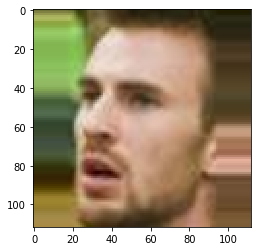

inlistpiccnt:  1000
dropcnt:  86
score:  [0.9985085]
nm0754512_rm944544000_1992-6-14_2002.jpg
age:  9
index:  56789
thisrowlist:  [9, 1, -1]


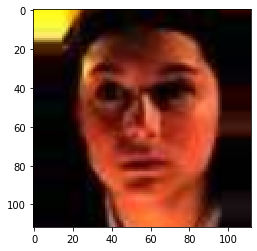

inlistpiccnt:  2000
dropcnt:  177
score:  [0.9999473]
nm0000924_rm2656279040_1972-7-28_2002.jpg
age:  29
index:  14732
thisrowlist:  [29, 1, -1]


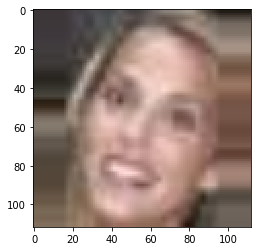

KeyboardInterrupt: 

In [6]:
imagepath='../IMDB Wiki/'
csvfile=imagepath+'IMDBWIKI.csv'

from PIL import Image
import gc
i=-1
theImageArraylist1=[]

imdbdropcnt=0

theLabelArraylist1=[]
theNameArraylist1=[]
droparray1=[]
with open(csvfile, newline='') as csvfile:

  # 讀取 CSV 檔案內容
    rows = csv.reader(csvfile)
    i=0
    j=0
    for row in rows:
        thisrowlist=[]
        i+=1
        
        if(i>2):
            

            try:
                age=int(row[0])
                
                if(age<=8 or age>90):
                    continue
                
                name=row[-1].split('.')[-2].split('/')[-1]+'.jpg'
                if(name.split('.')[-1]!='jpg'):
                    print(name)
                    continue
            except ValueError:
                continue

          
           

            if(name in filelist):

                indexx=filelist.index(name)
                

                fullname=filefullnamelist[indexx]
                gender=fullname.split('/')[-2]
                if(gender=='male'):
                    gender=0
                else:
                    gender=1
                im = cv2.imread(fullname)

                im,score=cropPaddingResize(im,112,112,mtcnn,0.1)
                if(score<0.90 ):
                    imdbdropcnt+=1
                   # droparray1.append(im)
                    """
                    print('!!!!!!!!!!!!!!')
                    print(name)
                    image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
                    print(score)
                    plt.imshow(image)
                    plt.show()
                    """
                    continue
                #im=cv2.resize(im,(112,112),interpolation=cv2.INTER_CUBIC)
                im=np.uint8(im)
                theImageArraylist1.append(np.uint8(im))
                thisrowlist.append(age)
                thisrowlist.append(gender)
                thisrowlist.append(-1)

                theLabelArraylist1.append(thisrowlist)
                theNameArraylist1.append(name)
                
                if(j%1000==0):
                    print('inlistpiccnt: ',j)
                    print('dropcnt: ',imdbdropcnt)
                    print('score: ',score)
                    image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))  
                    
                    print(name)
                    print('age: ',age)
                    print('index: ',indexx)
                    print('thisrowlist: ',thisrowlist)
                    plt.imshow(image)
                    plt.show()
                j+=1
                #cv2.imshow('My Image', im)
   
        
                
        #print(line)




In [ ]:
print(imdbdropcnt)
droparray1=np.array(droparray1)
print(droparray1.shape)
displaycnt=100
interrange=int(droparray1.shape[0]/displaycnt)
for i in range(droparray1.shape[0]):
    if(i%interrange==0):
        
        image = Image.fromarray(cv2.cvtColor(droparray1[i],cv2.COLOR_BGR2RGB))  
        plt.imshow(image)
        plt.show()
        bbox, scores, landmarks = mtcnn.detect(droparray1[i])
        print(bbox,scores,landmarks)
       # print('len(im):',len(im),'score:',score)
        print('@@@@@@@@@@@@@@@@@@')

In [ ]:
%xdel droparray1

In [ ]:
theImageArraylist1=np.uint8(theImageArraylist1)
theImageArray1=np.array(theImageArraylist1)#bgr
theLabelArray1=np.array(theLabelArraylist1)
theNameArray1=np.array(theNameArraylist1)

In [ ]:
np.save('../dataarray/three_attributes/imdbImage', theImageArray1)
np.save('../dataarray/three_attributes/imdbLabel', theLabelArray1)
np.save('../dataarray/three_attributes/imdbName', theNameArray1)

In [ ]:
%xdel theImageArraylist1
%xdel theImageArray1
%xdel theLabelArray1
%xdel theNameArray1


In [10]:
imagepath='../Manually_Annotated/Manually_Annotated_Images/'
csvfile='../Manually_Annotated/training.csv'
filelist=[]
filefullnamelist=[]

for path, subdirs, files in os.walk(imagepath):
    for name in files:

        filefullnamelist.append(os.path.join(path, name))
        filelist.append(os.path.join(path, name).split('/')[-2]+'/'+os.path.join(path, name).split('/')[-1])
print(len(filelist))
print(len(filefullnamelist))
print(filelist[0])
print(filefullnamelist[0])

427298
427298
440/00dc69e14fc9830e9f9ad3fb998a48378f5f3b07f42191bd0e1226b5.jpg
../Manually_Annotated/Manually_Annotated_Images/440/00dc69e14fc9830e9f9ad3fb998a48378f5f3b07f42191bd0e1226b5.jpg


In [13]:
affectGenderList=[]
csvfile2='../Manually_Annotated/Affect_gender_annotation.csv'
with open(csvfile2, newline='',encoding="utf-8") as csvfile:
    rows2 = csv.reader(csvfile)
    i=0
    j=0
    for row in rows2:
        i+=1
        if(i>1):
            namegender=tuple([row[0],row[1]])
            #print(type(row[0]),type(row[1]))
            affectGenderList.append(namegender)


In [14]:

print(type(affectGenderList[0]))
namelist=[kk[0] for kk in affectGenderList]
genderlist=[kk[1] for kk in affectGenderList]



<class 'tuple'>


inlistpiccnt:  0
dropcnt:  0
score:  [0.999767]
392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b55326e9181ee4520f9.jpg
1
index:  58808
thisrowlist:  [-1, 1, 0]


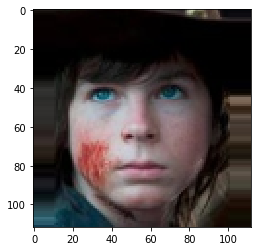

inlistpiccnt:  1000
dropcnt:  37
score:  [0.9999994]
673/d58242682e99a553ffa6fdebcfeb87c82a4f15acc64674a72832338b.jpg
0
index:  166314
thisrowlist:  [-1, 0, 5]


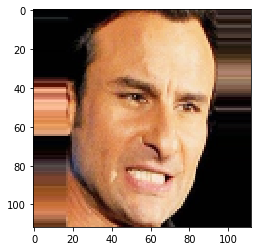

inlistpiccnt:  2000
dropcnt:  88
score:  [0.9999987]
468/5d74b82e0d52dd87e8d36ebf0efdbe5170e41c31827d76247343091f.jpg
-1
index:  97930
thisrowlist:  [-1, -1, 1]


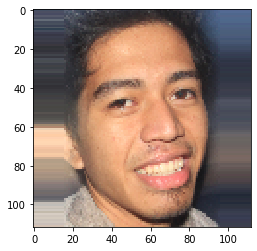

KeyboardInterrupt: 

In [15]:
imagepath='../Manually_Annotated/Manually_Annotated_Images/'
csvfile='../Manually_Annotated/training.csv'

files = os.listdir( imagepath )
from PIL import Image
import gc
i=-1
affectdropcnt=0
droparray2=[]

theImageArraylist2=[]
theLabelArraylist2=[]
theNameArraylist2=[]
with open(csvfile, newline='') as csvfile:

  # 讀取 CSV 檔案內容
    rows = csv.reader(csvfile)
    i=0
    j=0
    for row in rows:
        thisrowlist=[]
        i+=1
        if(i>2):
            skip=0

            try:
                name=row[0]
                facex=int(row[1])
                facey=int(row[2])
                width=int(row[3])
                height=int(row[4])
                emo=int(row[-3])
            except ValueError:
                continue

           
            if (emo<=5  ):
                
                if(name in filelist):
                    gender=-1
                    filenameNoFoler=name.split('/')[-1]
                    if(filenameNoFoler in namelist):
                        if(genderlist[namelist.index(filenameNoFoler)]=='boy'):
                            gender=0

                        elif(genderlist[namelist.index(filenameNoFoler)]=='girl'):
                            gender=1
                            
                    indexx=filelist.index(name)

                    fullname=filefullnamelist[indexx]
                    im = cv2.imread(fullname)
                    im,score=cropPaddingResize(im,112,112,mtcnn,0.1)
                    if(score<0.90 ):
                        affectdropcnt+=1
                        droparray2.append(im)
                        """
                        print('!!!!!!!!!!!!!!')
                        print(name)
                        image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))
                        print(score)
                        plt.imshow(image)
                        plt.show()
                        """
                        continue
                    #crop_img = im[facey:facey+height, facex:facex+width]
                    #im=cv2.resize(crop_img,(112,112),interpolation=cv2.INTER_CUBIC)
                    im=np.uint8(im)
                    thisrowlist.append(-1)
                    thisrowlist.append(gender)
                    thisrowlist.append(emo)
                    theImageArraylist2.append(im)
                    theLabelArraylist2.append(thisrowlist)
                    theNameArraylist2.append(name)
                    
                    if(j%1000==0):
                        print('inlistpiccnt: ',j)
                        print('dropcnt: ',affectdropcnt)
                        print('score: ',score)
                        image = Image.fromarray(cv2.cvtColor(im,cv2.COLOR_BGR2RGB))  

                        print(name)
                        print(gender)
                        print('index: ',indexx)
                        print('thisrowlist: ',thisrowlist)
                        plt.imshow(image)
                        plt.show()
                    j+=1
                    #cv2.imshow('My Image', im)
   
        
                
        #print(line)


In [ ]:
print(affectdropcnt)

In [ ]:
print(len(droparray2))

(102,)


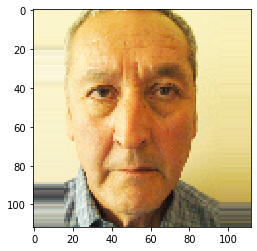

[[  3.8059173  16.581635  103.0579     86.00484  ]] [0.99991035] [[42.061142 41.050274 65.09718  82.501114 81.85289  36.25283  67.841515
  50.852936 39.919006 64.066574]]
@@@@@@@@@@@@@@@@@@


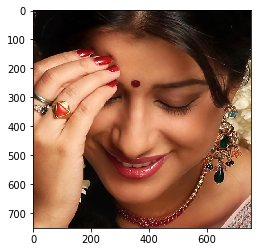

[[ 68.951836  161.82268   655.3562    606.263    ]
 [310.87692    -1.3567829 355.3946     34.058895 ]] [0.9960478  0.94606096] [[297.36066  316.83313  468.92978  485.82074  497.36566  270.67877
  473.1291   353.33594  258.94196  465.99445 ]
 [332.00592  330.31732  339.80185  346.169    345.31845    8.802449
   23.179127  14.214332  10.63943   23.312576]]
@@@@@@@@@@@@@@@@@@


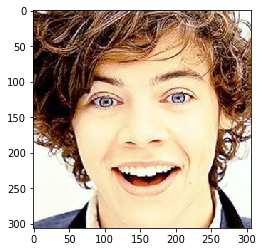

[] [] []
@@@@@@@@@@@@@@@@@@


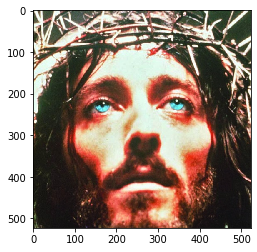

[] [] []
@@@@@@@@@@@@@@@@@@


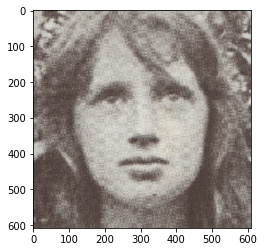

[[ 80.433365 111.91347  554.76324  479.73947 ]
 [ 63.03281   17.355883 108.12543   55.22377 ]] [0.9995572 0.9308814] [[247.7599   248.06766  341.0341   433.4829   436.10333  225.49084
  392.36523  312.02087  240.89941  375.46042 ]
 [ 78.08265   80.603546  88.74455   95.23134   97.229385  32.29797
   49.427387  41.239525  30.902729  44.722992]]
@@@@@@@@@@@@@@@@@@


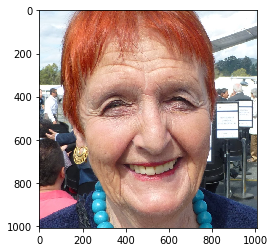

[[371.26038 854.45685 405.68643 875.68317]
 [106.48602 187.69977 928.84814 801.8698 ]
 [371.07257  65.4171  400.00864  84.10538]] [0.9998646 0.9994603 0.8957638] [[383.89725  384.12704  390.4718   396.54892  397.00317  872.0894
  875.5104   878.9976   870.5188   873.54083 ]
 [441.69565  421.4732   624.66284  723.71545  696.90924  358.39023
  647.2367   528.5633   389.32492  661.0919  ]
 [380.97623  383.60638  388.5941   392.33047  394.9644    74.40738
   80.83237   78.440605  69.85857   74.76298 ]]
@@@@@@@@@@@@@@@@@@


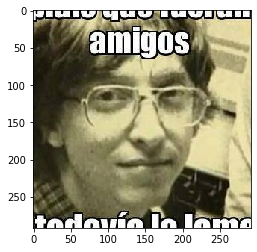

[] [] []
@@@@@@@@@@@@@@@@@@


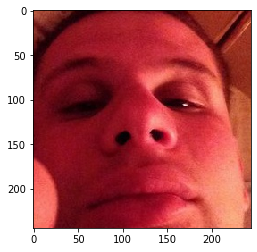

[] [] []
@@@@@@@@@@@@@@@@@@


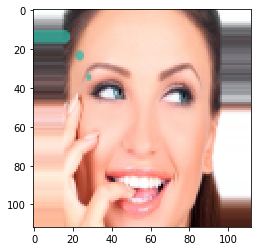

[[ -7.925787  11.529364 116.74658   94.727585]] [0.9924555] [[41.301743 43.552147 70.520706 86.14076  87.373764 38.762993 75.30479
  55.666115 35.4409   71.08538 ]]
@@@@@@@@@@@@@@@@@@


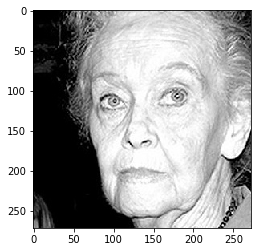

[] [] []
@@@@@@@@@@@@@@@@@@


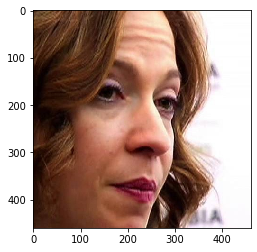

[[ -6.5414047  31.035564  460.2737    318.55298  ]
 [170.84456   257.589     227.11241   301.51     ]] [0.99997556 0.78825533] [[176.7817  195.85631 278.99335 360.24377 367.96564 162.89938 286.86206
  268.2707  165.99263 266.521  ]
 [192.23409 192.88214 203.95605 212.60086 213.27208 274.2257  294.81494
  284.93088 273.4681  292.42114]]
@@@@@@@@@@@@@@@@@@


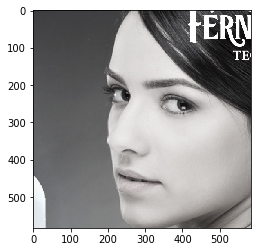

[] [] []
@@@@@@@@@@@@@@@@@@


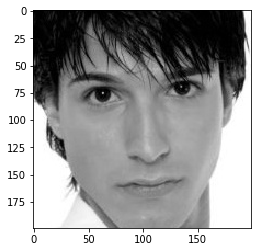

[] [] []
@@@@@@@@@@@@@@@@@@


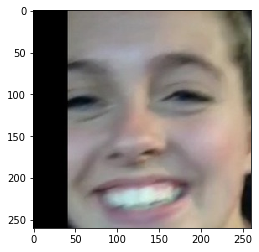

[] [] []
@@@@@@@@@@@@@@@@@@


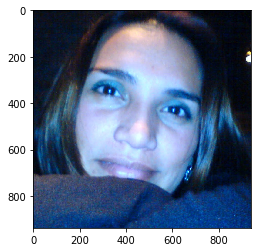

[] [] []
@@@@@@@@@@@@@@@@@@


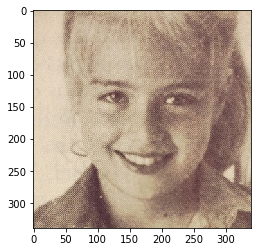

[] [] []
@@@@@@@@@@@@@@@@@@


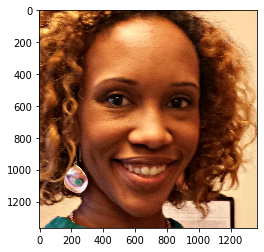

[[ 9.66672211e+01  2.04218399e+02  1.25421899e+03  1.01269867e+03]
 [ 6.93269226e+02 -8.06101799e-01  9.04402588e+02  1.37965759e+02]] [0.9999838  0.73536104] [[558.7722   576.4241   796.0884   919.06714  933.22217  500.13544
  875.03564  719.8163   455.0035   847.3678  ]
 [772.75385  764.28186  804.4412   853.80774  847.5092    23.965052
   63.098907  27.30469   31.05958   61.71267 ]]
@@@@@@@@@@@@@@@@@@


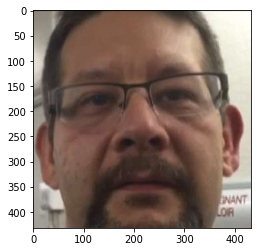

[[ 15.692165  29.08458  466.5451   371.8614  ]
 [200.67044  133.50984  366.03833  269.8761  ]
 [110.779434 122.11532  407.69534  360.74957 ]] [0.999982   0.98194236 0.86954457] [[185.40125 172.0105  238.28348 361.4781  355.22195 126.56755 287.03912
  218.37376 159.07144 289.83237]
 [267.7811  265.4693  297.45157 329.20453 327.6759  184.37228 242.62054
  217.63112 187.96869 238.92084]
 [211.44861 198.68173 245.40501 319.61707 311.67035 185.89983 274.67108
  227.68796 199.54413 284.38214]]
@@@@@@@@@@@@@@@@@@


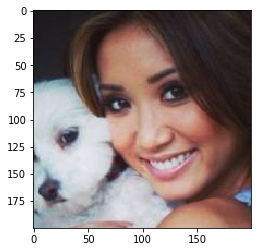

[[ 13.411976  55.916508 180.08388  186.88434 ]
 [ 75.26759  107.42059  165.95052  179.98595 ]] [0.9997737  0.71583086] [[ 86.23413   73.55551  121.88455  138.54988  126.1904    77.72296
  128.6224   100.07733   97.273285 148.13065 ]
 [115.24558  114.48306  129.87062  141.95836  141.16806  129.04219
  156.18062  137.9053   127.93598  151.3782  ]]
@@@@@@@@@@@@@@@@@@


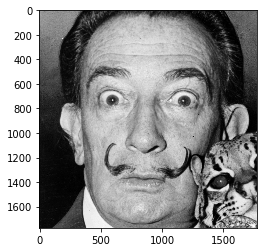

[[  74.40962  292.50055 1714.7717  1495.0123 ]
 [1334.6105  1440.2683  1432.7681  1522.2261 ]] [0.9908104 0.8637919] [[ 713.1599   728.45667 1063.297   1313.3148  1323.7306   607.57947
  1176.3745   859.5238   619.18945 1102.2006 ]
 [1366.9224  1364.4146  1383.4286  1410.4335  1408.7273  1464.7932
  1497.859   1479.8511  1469.8439  1494.9828 ]]
@@@@@@@@@@@@@@@@@@


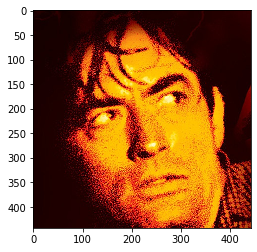

[] [] []
@@@@@@@@@@@@@@@@@@


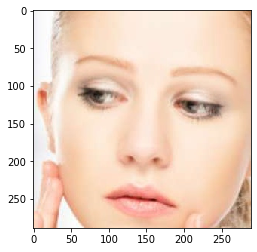

[] [] []
@@@@@@@@@@@@@@@@@@


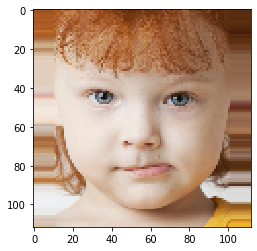

[[  9.300608  18.106201 103.489136  95.371254]] [0.9847061] [[45.53367  46.037247 66.66802  82.093575 82.23384  36.918045 74.02063
  54.45774  39.873817 70.61999 ]]
@@@@@@@@@@@@@@@@@@


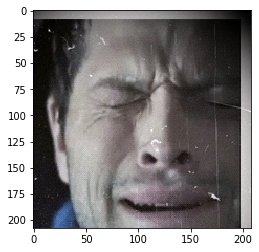

[] [] []
@@@@@@@@@@@@@@@@@@


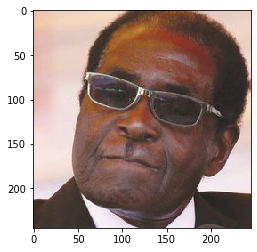

[[ 35.136894  45.717518 220.31042  197.5115  ]
 [ 81.33858  107.57631  213.49306  205.93423 ]] [0.9994549 0.8422709] [[ 94.79558  108.65781  131.6799   165.09753  177.71686   90.74887
  158.45586  116.11774   78.91095  137.67578 ]
 [124.09711  127.336136 154.11012  179.97955  181.824    153.08197
  182.15393  167.4122   146.69162  171.51457 ]]
@@@@@@@@@@@@@@@@@@


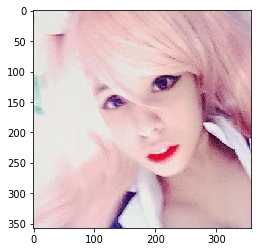

[] [] []
@@@@@@@@@@@@@@@@@@


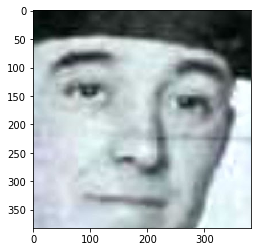

[] [] []
@@@@@@@@@@@@@@@@@@


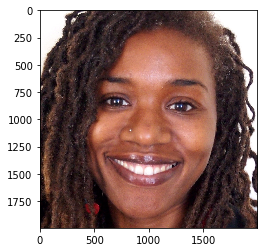

KeyboardInterrupt: 

In [16]:

droparray2=np.array(droparray2)
print(droparray2.shape)
displaycnt=100
interrange=int(droparray2.shape[0]/displaycnt)
for i in range(droparray2.shape[0]):
    if(i%interrange==0):
        
        image = Image.fromarray(cv2.cvtColor(droparray2[i],cv2.COLOR_BGR2RGB))  
        plt.imshow(image)
        plt.show()
        bbox, scores, landmarks = mtcnn.detect(droparray2[i])
        print(bbox,scores,landmarks)
       # print('len(im):',len(im),'score:',score)

        print('@@@@@@@@@@@@@@@@@@')
        
        

In [ ]:
%del droparray2

In [ ]:
theImageArraylist2=np.uint8(theImageArraylist2)
theImageArray2=np.array(theImageArraylist2)#bgr
theLabelArray2=np.array(theLabelArraylist2)
theNameArray2=np.array(theNameArraylist2)


In [ ]:
np.save('../dataarray/three_attributes/affectImage', theImageArray2)
np.save('../dataarray/three_attributes/affectLabel', theLabelArray2)
np.save('../dataarray/three_attributes/affectName', theNameArray2)



In [ ]:
%xdel theImageArraylist1
%xdel theImageArraylist2

In [ ]:
%xdel theImageArray2
%xdel theLabelArray2
%xdel theNameArray2

In [ ]:
theImageArray1=np.load('../dataarray/three_attributes/imdbImage.npy')
theLabelArray1=np.load('../dataarray/three_attributes/imdbLabel.npy')
theNameArray1=np.load('../dataarray/three_attributes/imdbName.npy')



In [ ]:
theImageArray2=np.load('../dataarray/three_attributes/affectImage.npy')
theLabelArray2=np.load('../dataarray/three_attributes/affectLabel.npy')
theNameArray2=np.load('../dataarray/three_attributes/affectName.npy')

In [ ]:
theImageArray=np.concatenate((theImageArray1, theImageArray2))
theLabelArray=np.concatenate((theLabelArray1, theLabelArray2))
theNameArray=np.concatenate((theNameArray1, theNameArray2))

In [ ]:
print(theImageArray.shape)
print(theLabelArray.shape)
print(theNameArray.shape)

In [ ]:
gc.collect()

In [ ]:

def shuffle_in_unison(a, b,c):
    assert len(a) == len(b)
    assert len(a) == len(c)
    shuffled_a = np.empty(a.shape, dtype=a.dtype)
    shuffled_b = np.empty(b.shape, dtype=b.dtype)
    shuffled_c = np.empty(c.shape, dtype=c.dtype)
    permutation = np.random.permutation(len(a))
    for old_index, new_index in enumerate(permutation):
        shuffled_a[new_index] = a[old_index]
        shuffled_b[new_index] = b[old_index]
        shuffled_c[new_index] = c[old_index]
    return shuffled_a, shuffled_b ,shuffled_c

x=shuffle_in_unison(theLabelArray, theImageArray,theNameArray)
theLabelArray=x[0]
theImageArray=x[1]
theNameArray=x[2]

In [ ]:
testratio=0.1
trainratio=1-testratio
traincnt=int(round(theImageArray.shape[0]*trainratio))
print(traincnt)




theImageArraytrain=theImageArray[:traincnt]
theImageArraytest=theImageArray[traincnt:]

theLabelArraytrain=theLabelArray[:traincnt]
theLabelArraytest=theLabelArray[traincnt:]

theNameArraytrain=theNameArray[:traincnt]
theNameArraytest=theNameArray[traincnt:]

In [ ]:
print(theImageArraytrain.shape)
print(theImageArraytest.shape)
print(theLabelArraytrain.shape)
print(theLabelArraytest.shape)
print(theNameArraytrain.shape)
print(theNameArraytest.shape)

print("%d bytes" % (theLabelArraytrain.size * theLabelArraytrain.itemsize))

In [ ]:
np.save('../dataarray/three_attributes/theImageArraytrain', theImageArraytrain)
np.save('../dataarray/three_attributes/theImageArraytest', theImageArraytest)

np.save('../dataarray/three_attributes/theLabelArraytrain', theLabelArraytrain)
np.save('../dataarray/three_attributes/theLabelArraytest', theLabelArraytest)

np.save('../dataarray/three_attributes/theNameArraytrain', theNameArraytrain)
np.save('../dataarray/three_attributes/theNameArraytest', theNameArraytest)